# WELCOME
I'm Tan Chuan Xin. This project is about the SpaceNet6 challenge. 

![alt text](https://miro.medium.com/max/19034/1*F7vFbcWflRpptmmnvWMmpg.jpeg)

This notebook shall serve as a guide towards explaining what the keras_12 series notebooks do, and how the code works in general. 

Do read the guide below in relation to the code that can be found after it. Open up the table of contents on the left hand side to view the notebook structure by headings for easier navigation. It helps a lot.


## Guide on using the keras_12 notebook template

### **0. GPU use**
Before running anything, if the session requires a GPU, it must be selected from the start. Switching halfway will cause all local variables to be lost. 

If the GPU is not needed, do not connect to it. There are limits placed on GPU usage time, which will be reset every 1-1.5 days. Usage is limited to a few hours each day. Error message when connecting will look like this: 

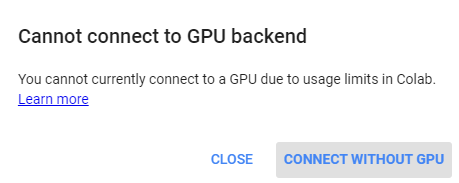

The more you use the slower the GPU assigned to you, since this is a free platform 

To connect to a GPU, 
* Click 'Runtime' at the top left menu bar
* Click 'Change Runtime Type'
* Dropdown menu of 'Hardware Accelerator', click 'GPU'
* Click 'Save'
* Top right menu bar, click 'Connect' or 'Reconnect' accordingly 

### **1. Change the global stuff**
The global stuff are things that will be set and used for the entire notebook. Do check these parameters because they affect a lot of subsequent functions and should only have their value initialized once
  * **DATA \ What is this notebook about**
    * Change the description to fit the goal of this particular notebook
  * **DATA \ Global \ Constants, IMG**
    * seed = 42
      * Used to seed a predictable set of random values for random operations. Can change this if you want, but it's the meaning of life.
    * IMG_HEIGHT = 256, IMG_WDITH = 256
      * Check prior to executing the notebook. It will affect the directories and images that are going to be used subsequently for the entire notebook. 256x256 is used because the original 900x900 image is rather big and this seems a suitable size for fast enough operations, but you can change this any way you like. 
    * PATH_SPACENET6 = Path(root_dir + '/spacenet6')
      * The directory that all files related to this project is in. Change if need
    * PATH_METRICS = PATH_SPACENET6/'metrics_keras_12.csv'
      * The path to the metrics csv file that will keep track of vital information of each model. Change when needed 

  * **DATA \ Global \ SIZE, IDX**
    * SIZE_ALL = 3401
      * Do not change unless really necessary, this is the number of image files in the train_all folder for the training images
    * SIZE_TRAIN = XXX, SIZE_TEST = XXX
      * Note that SIZE_TRAIN + SIZE_TEST = 3401 should be obeyed. We are using some of the training images as test images because the actual test images supplied do not come with a ground truth, hence we cannot score our model
    * TRAIN_IDX, TEST_IDX
      * These are indices on an array of 3401 that are randomly generated based on the given SIZE_TRAIN and SIZE_TEST. However these indices will be saved into a temporary .npy file in the root path of PATH_SPACENET6 to allow for fast and standardized trial and error using the same images, to minimise the number of variables being changed at any one time. 
      * Three sets have been supplied already in train-test pairs, namely 800-80, 1600-160, 3200-201. The last one is the full set

  * **DATA \ Global \ Rotation file**
    * This is used to identify the rotation flag for the data. Don't need to change

### **2. Helper Functions**
These are functions that perform some small, non-critical tasks. Usually for I/O and visualization operations
  * **DATA \ Helper functions**
    * rotation()
      * This function is used to rotate a SAR Image specifically. Because the SAR satellite has flightpaths from North-South and South-North, the angle of image capture is different. This affects the image greatly, and rotation might be necessary to standardize image directions. The rotation is determined by the rotation file and the image file name
      * function signature
       * ```in: filename: string, img: np.ndarray```
       * ```out: img: np.ndarray```
    * plot_XY()
      * This function is used to plot an image (X) together with its mask (Y), as verification that the mask has been created succesfully. Note that the image to be passed in should be in standard image format (height x width x channel). 
      * Note also that X and Y are arrays of images. Passing in the optional parameter _index_ will choose that specific index for plotting
      * function signature
        * in: plotname: string, X: np.ndarray, Y: np.ndarray, X_name: string, Y_name: string, index=None: int
        * out: None
    * plot_XY_preds()
      * This function is used to plot an image (X) together with its mask (Y) and the prediction for the image (P), as a comparison for the prediction vs the ground truth. Note that the image to be passed in should be in standard image format (height x width x channel)
      * Note also that X and Y and P are arrays of images. Passing in the optional parameter _index_ will choose that specific index for plotting      
      * function signature
        * ```in: plotname: string, X: np.ndarray, Y: np.ndarray, P: np.ndarray, X_name: string, Y_name: string, P_name: string, index=None: int```
        * ```out: None```
    * plot_history()
      * This function is used to plot the metrics of the model. It will plot out loss, iou_score and f1_score for the training, validation and test set
      * function signature
        * ```in: history: history object from model```
        * ```out: None```
    * store_metrics()
      * This function is used to store various information regarding a trained model into a csv file. The csv file makes it easier to compare information, rather than browsing across different notebooks, or even within one long notebook
      * The bit of code above the function will create the desired metric file if not created
      * function signature
        * ```in: test_loss: float32, test_iou_score: float32, test_f1_score: float32, val_loss: float32, val_iou_score: float32, val_f1_score: float32, train_loss: float32, train_iou_score: float32, train_f1_score: float32,IMG_TYPE: string, IMG_ROTATED: boolean, MODEL_NAME: string, MODEL_TYPE: string, MODEL_PRETRAIN: string, MODEL_LOSS_FUNCTION: string, MODEL_COMMENTS: string, MODEL_BATCH_SIZE: int64, MODEL_EPOCHS: int64, SIZE_TRAIN: int64, SIZE_TEST: int64, PATH_METRICS: PosixPath```
        * ```out: None```

### **3. Generator**
These are functions that are integral for creating the data to be used for the models, creating the models themselves. 

Generators return every single variable that might be necessary, so that these variables can be overwritten as a quick and dirty way of testing out various things. Therefore the input and return variables can be fairly long 

The generators are also pipelined such that each function is called successively. 

  * **DATA \ Generator**
    * gen_input_image_details()
      * This function is used to set the image specifications for the model that we are training. It makes use of the global lookup dictionary IMG_TYPE_LOOKUP to determine some of the image specifications
        * function signature
          * ```in: IMG_TYPE: string, IMG_ROTATED: boolean, IMG_HEIGHT=IMG_HEIGHT: int64, IMG_WIDTH=IMG_WIDTH: int64, IMG_TYPE_LOOKUP=IMG_TYPE_LOOKUP: dictionary```
          * ```out: IMG_TYPE: string, IMG_HEIGHT: int64, IMG_WIDTH: int64, IMG_ROTATED: boolean, IMG_CHANNELS: int64, IMG_DTYPE_SRC: type, IMG_DTYPE: type```
    * gen_paths()
      * This function is used to generate the various paths to traverse the directory for files that are needed. If the directory does not exist, it will create these directories. 
      * function signature
        * ```in: IMG_TYPE: string, IMG_ROTATED: boolean, IMG_HEIGHT=IMG_HEIGHT: int64, IMG_WIDTH=IMG_WIDTH: int64```
        * ```out: PATH_SRC: PosixPath, PATH_SRC_IMAGE: PosixPath, PATH_SRC_MASK: PosixPath, PATH_DATA: PosixPath, PATH_IMAGE: PosixPath, PATH_MASK: PosixPath, PATH_SAMPLE: PosixPath, PATH_SAVED_MODELS: PosixPath```
    * gen_resized_images()
      * This function is used to generate the required images based on the IMG_TYPE, IMG_HEIGHT, IMG_WIDTH and IMG_ROTATED variables. If the required images are already prepared, it will not generate them again. If they are not ready, directories will be created and images will be saved
      * function signature
        * ```in: PATH_SRC_IMAGE: PosixPath, PATH_SRC_MASK: PosixPath, PATH_IMAGE: PosixPath, PATH_MASK: PosixPath, IMG_HEIGHT=IMG_HEIGHT: int64, IMG_WIDTH=IMG_WIDTH: int64```
        * out: ```None```
    * gen_train_test_set()
      * This function will create the train-test set based on images specifications we want, and the global SIZE variables. Remember that the 'test' images actually come from the train images because we need the ground truth
      * To speed up testing, it will load in sample data if they are available. Sample data is made available after the first run of code, where the images will be generated based on random index, and saved in a .npy file format. This greatly speeds up data retrieval and standardises the random data used across experiments 
      * If sample data is not available, based on the SIZE specified, random IDX files will be generated and random SAMPLE data will be created based on the IDX
      * function signature
        * ```in: PATH_IMAGE: PosixPath, PATH_MASK: PosixPath, IMG_CHANNELS: int64, IMG_DTYPE_SRC: type, TRAIN_IDX: int64[], TEST_IDX: int64[]: , SIZE_TRAIN=SIZE_TRAIN: int64, SIZE_TEST=SIZE_TEST: int64, IMG_HEIGHT=IMG_HEIGHT: int64, IMG_WIDTH=IMG_WIDTH: int64```
        * ```out: X_train: np.ndarray, Y_train: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray```
    * gen_model()
      * This function will generate a keras model that is based off the segmentation_models module found from [their github link](https://github.com/qubvel/segmentation_models). Of course, this code can be modified to generate all sorts of models, but in the interest of time only this particular module will be explored
      * The model will be generated based on a whole slew of inputs that we are giving the model. Do take note that some aspects of the model will be hardcoded into the gen_model() function. These need to be changed within the function, or modify the function signature to accept these hardcoded parts as variables to be passed on
      * function signature
        * ```in: MODEL_LOSS: function, MODEL_BATCH_SIZE: int64, MODEL_EPOCHS: int64, MODEL_TYPE: string, MODEL_PRETRAIN: string, MODEL_LOSS_FUNCTION: string, IMG_CHANNELS: int64, MODEL_ID=None: int64, MODEL_COMMENTS='': string```
        * ```out: MODEL_OPTIMIZER: string, MODEL_LOSS: function, MODEL_METRICS: function[], MODEL_VAL_SPLIT: float32, MODEL_VAL_OFFSET: int64, MODEL_BATCH_SIZE: int64, MODEL_EPOCHS: int64, MODEL_TYPE: string, MODEL_PRETRAIN: string, MODEL_LOSS_FUNCTION: string, MODEL_COMMENTS: string, MODEL_ID: int64, MODEL_NAME: string, model: keras model```
    * gen_model_results()
      * This function will essentially be used to train the model that was generated previously, after being given a few more variables to work with. Do note that the callbacks have been hardcoded, and to change it, either change the hardcoded values, or recode the function to accept variables
      * This function operates on two modes: training a completely new model, or further train a model based on a pretrained one. 
        * To further train a saved model, pass in the filename for the model that we want to load. Then provide the number of additional epochs to train the model for. If set to 0, then the model will be loaded without any additional training. 
      * The model can be saved by setting save_model=True
      * function signature
        * ```in: PATH_SAVED_MODELS: PosixPath, MODEL_NAME: string, X_train: np.ndarray, Y_train: np.ndarray, MODEL_BATCH_SIZE: int64, MODEL_EPOCHS: int64, MODEL_VAL_SPLIT: float32, load_weights_filename='': string, load_weights_epochs=0: int64, save_model=False: boolean```
        * ```out: results: keras results , model: keras model```
    * gen_predictions()
      * This function generates the predictions for a train-val-test set based on the model that was loaded/trained before and displays the output. If the results of a trained model are available, it plots the various model metrics over the epochs training cycle to visualize the changes in the model and perhaps tweak overfitting etc
      * Note that keras takes validation split from the rear index of an input training set, therefore the hardcoded array splicing to seperate train into train-val
      * The prediction metrics will then be saved into the target results csv file
      * The return will be the predictions as np.ndarray (formatted as image)
      * function signature
        * ```in: model: keras model, X_train: np.ndarray, Y_train: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray, MODEL_VAL_OFFSET: int64, IMG_TYPE: string, IMG_ROTATED: boolean, MODEL_NAME: string, MODEL_TYPE: string, MODEL_PRETRAIN: string, MODEL_LOSS_FUNCTION: string, MODEL_COMMENTS: string, MODEL_BATCH_SIZE: int64, MODEL_EPOCHS: int64, SIZE_TRAIN=SIZE_TRAIN: int64, SIZE_TEST=SIZE_TEST: int64, PATH_METRICS=PATH_METRICS: PosixPath()```
        * ```out: preds_train_t: np.ndarray, preds_val_t: np.ndarray, preds_test_t: np.ndarray```

### **4. Bring in the SAR data**
* **DATA \ Bring in the SAR data, both rotated and un-rotated**

Essentially this just works to load in the SAR data that we want to work with and make it available for the rest of the notebook. Just load once and forget about it after. It is more efficient.

We load in both datasets in case we need them. This section will call generator functions of 
* gen_input_image_details()
* gen_paths()
* gen_resized)images()
* gen_train_test_set()

Make sure to load in all the data that you might want to train over here! And this data is dependent on the global SIZE_TRAIN and SIZE_ALL variables. Of course, they can be overwritten at this point, but try and keep it in global for easier tracking

### **5. Experiment with models**
* **EXPERIMENT \ Experiment details**

List out what the models here are testing, and some of the key model parameters that have been changed in this notebook relative to the other notebooks, or the previous one.

This will serve to keep track of changing model inputs and can be quickly referred to when referencing multiple notebooks.

* **EXPERIMENT \ Experiment XXX**
  * This will be some group of experiment based on some key feature. Repeat a few times just to make sure that whatever result comes out is not a fluke. 
  * It might be good to repeat the same run two times or more


* **EXPERIMENT \ Experiment XXX \ ID XXX**

    * Provide a numerical ID to the model that we are training, so that it is easier to identify later when trying to retrieve a model.

    * Standard format to run an experiment has been pushed into the generator functions for ease of use. For something more customizable, you can copy the internal code of each generator function sequentially and modify accordingly. The steps are as follows:
      1. gen_input_image_details() - to fix the image specifications for the model
        * For SAR, can choose whether to use the rotated images or not using a boolean flag
      2. gen_paths() - to fix the paths that will be used for this model
      3. Select the data to use from before, when the data was brought in
      4. gen_model() - to create the desired model based on the parameters provided to it. Pay special attention to this step, a lot of model parameters are set here
      5. gen_model_results() - to train the model. This step can also be used to load in an existing model and train it further or simply use it to predict 
      6. gen_predictions() - after model has been trained, use it to generate predictions and obtain metrics for the models' performance. Metrics will be saved in the designated csv file
      7. plot_XY_preds() - used to plot some of the predictions beside the ground truth as a visual method of seeing the results 

# --------- TEMPLATE BELOW ---------

# DATA

## What is this notebook about

This notebook builds upon the notebook ``` spacenet6_masking.ipynb ```

``` spacenet6_masking.ipynb ``` is used to generate all the masks for all 3401 training images, using only the PAN images and geojson_buildings files. These masks will be the same regardless of the original data format, hence it is a run-once-and-forget. 


**Show work**

This notebook shall be used to show some of the work that has already been done in the other notebooks, more specifically the keras_12 series of notebooks

Do refer to this to learn how to perhaps use the functions, and also to view the results


## Setup COLAB and imports

Mount drive to gain access to files

In [ ]:
''' Used to reference the root directory, for directory traversal ''' 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
mount_dir = '/content/gdrive'
root_dir = '/content/gdrive/My Drive/Colab Notebooks'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Installations required

In [ ]:
! pip install fiona
! pip install rasterio
! pip install segmentation-models

     |████████████████████████████████| 14.7MB 310kB/s 
     |████████████████████████████████| 18.2MB 237kB/s 
     |████████████████████████████████| 51kB 3.4MB/s 


In [ ]:
''' colab recently upgraded their tensorflow packages and some stuff is breaking as of 4 Aug 2020'''
''' use this version of tensorflow for now'''
! pip install q tensorflow==2.1

     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 3.9MB 34.7MB/s 
     |████████████████████████████████| 450kB 42.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=26b729ac41be645d483af818d16aaebe501ec4a29ff7dd8b627649d1286fb85b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: 

Imports required

In [ ]:
''' dealing with .tif files '''
import fiona
import rasterio
from rasterio.mask import mask
from rasterio.plot import show, reshape_as_raster, reshape_as_image

''' plotting images '''
from matplotlib import pyplot as plt
%matplotlib inline

''' traversing directories '''
import os
from pathlib import Path

''' core '''
import numpy as np
import pandas as pd

''' utilities '''
from tqdm import tqdm
import copy
import datetime

''' image processing '''
import tensorflow as tf
from tensorflow.keras.preprocessing import image

''' unet model '''
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models.losses import JaccardLoss, BinaryFocalLoss, DiceLoss, BinaryCELoss
from segmentation_models.metrics import IOUScore, FScore

## Global

### Constants, IMG
For reference the various image types are as such (amax is a rough gauge) based on the train_all data

```
type             shape                dtype       gauge of max value    gauge of min value
PAN              (1, 900, 900)        uint16      1844                  0
PS-RGB           (3, 900, 900)        uint8       255                   0
PS-RGBNIR        (4, 900, 900)        uint16      2047                  0
RGBNIR           (4, 450, 450)        uint16      2047                  0
SAR-Intensity    (4, 900, 900)        float32     92.87763              0.0
```



In [ ]:
''' get the same sequence for random set every time '''
seed = 42
np.random.seed = seed
tf.seed = seed       

''' lookup - define image channels for each image type '''
IMG_TYPE_LOOKUP = {
    'PAN': {'channels': 1, 'dtype': np.uint16}, 
    'PS-RGB': {'channels': 3, 'dtype': np.uint8}, 
    'PS-RGBNIR': {'channels': 4, 'dtype': np.uint16}, 
    'RGBNIR': {'channels': 4, 'dtype': np.uint16}, 
    'SAR-Intensity': {'channels': 4, 'dtype': np.float32}, 
}

''' image height and width we are working with for the whole notebook '''
IMG_HEIGHT = 256    
IMG_WIDTH = 256

''' root of all paths '''
PATH_SPACENET6 = Path(root_dir + '/spacenet6')
PATH_METRICS = PATH_SPACENET6/'metrics_keras_12.csv'

### SIZE, IDX
We will be setting the amount of data that we want to use for train/test
* There are 3401 images for each image type
* The actual spacenet6 "test folder" has only uneseen SAR-Intensity data

Therefore for training purposes, we will pull out our own "test data" from the training set for ease of verifying output 

Random indexes will be used for training and test

In [ ]:
''' set the various sizes we want to use '''
SIZE_ALL = 3401 
SIZE_TRAIN = 800           # CHANGE HERE
SIZE_TEST = 80            # CHANGE HERE
# 800-80, 1600-160, 3200-201

''' set the various idexes we want to use '''
try:
  TRAIN_IDX = np.load(PATH_SPACENET6/('TRAIN_IDX_'+str(SIZE_TRAIN)+'.npy'))
  TEST_IDX = np.load(PATH_SPACENET6/('TEST_IDX_'+str(SIZE_TEST)+'.npy'))
  print('TRAIN/TEST indexes available. Loading ')
except:
  ''' Generate the indexes that we will be using for train and test '''  
  ALL_IDX = np.arange(SIZE_ALL)

  TRAIN_IDX = np.random.choice(ALL_IDX, SIZE_TRAIN, replace=False)
  TRAIN_IDX.sort()

  ALL_IDX_2 = np.setdiff1d(ALL_IDX, TRAIN_IDX)

  TEST_IDX = np.random.choice(ALL_IDX_2, SIZE_TEST, replace=False)
  TEST_IDX.sort()

  np.save(PATH_SPACENET6/('TRAIN_IDX_'+str(SIZE_TRAIN)), TRAIN_IDX)
  np.save(PATH_SPACENET6/('TEST_IDX_'+str(SIZE_TEST)), TEST_IDX)
  print('TRAIN/TEST indexes not available. Generated and saved ')

TRAIN/TEST indexes available. Loading 


### Rotation file
These are the images that have been rotated

In [ ]:
TO_ROTATE = []
PATH_ORIENTATIONS = PATH_SPACENET6/'spacenet6_data_BACKUP/train_all/AOI_11_Rotterdam/SummaryData/SAR_orientations.txt'

orientation_file = open(PATH_ORIENTATIONS, "r")
for line in orientation_file:
  tilename = line.split(' ')[0]
  orientation_flag = int(line.split(' ')[1])

  if orientation_flag == 1:
    TO_ROTATE.append(tilename)

TO_ROTATE.sort()

print('orientation file loaded')

orientation file loaded


## Helper functions

### rotation()

In [ ]:
def rotation(filename, img):
  try:
    if filename.split(IMG_TYPE+'_')[1].split('_tile_')[0] in TO_ROTATE:
      return np.fliplr(np.flipud(img))
    else:
      return img
  except: 
    pass

  try:
    if filename.split('Buildings_')[1].split('_tile_')[0] in TO_ROTATE:
      return np.fliplr(np.flipud(img))
    else:
      return img
  except: 
    pass
      
  
  return img

### plot_XY()

In [ ]:
def plot_XY(plotname, X, Y, X_name, Y_name):
  ix = np.random.randint(0, len(X))
  print("index: {}".format(ix))
  print(plotname, " set")

  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
  show(reshape_as_raster(X[ix]), ax=ax1, title=X_name)
  show(reshape_as_raster(Y[ix]), ax=ax2, title=Y_name)
  plt.show()

### plot_XY_preds()

In [ ]:
def plot_XY_preds(plotname, X, Y, P, X_name, Y_name, P_name, index=None):
  if index==None:
    ix = np.random.randint(0, len(X))
  else:
    ix = index
  print("index: {}".format(ix))
  print(plotname, " set")

  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))

  if X.dtype == 'float32':
    show(reshape_as_raster(  (X[ix] - np.amin(X)) / (np.amax(X) - np.amin(X))   ), ax=ax1, title=X_name)
  else:
    show(reshape_as_raster(X[ix]), ax=ax1, title=X_name)
  show(reshape_as_raster(Y[ix]), ax=ax2, title=Y_name)
  show(reshape_as_raster(P[ix]), ax=ax3, title=P_name)
  plt.show()

### plot_history()

In [ ]:
def plot_history(history):
  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))

  ax1.plot(history['loss'], label='train')
  ax1.plot(history['val_loss'], label='val')
  ax1.title.set_text('loss')
  ax1.legend()

  ax2.plot(history['iou_score'], label='train')
  ax2.plot(history['val_iou_score'], label='val')
  ax2.title.set_text('iou_score')
  ax2.legend()

  ax3.plot(history['f1-score'], label='train')
  ax3.plot(history['val_f1-score'], label='val')
  ax3.title.set_text('f1-score')
  ax3.legend()

### store_metrics()
Save into the metrics file

In [ ]:
try: 
  METRICS_HISTORY = pd.read_csv(PATH_METRICS)
except:
  TIMESTAMP = datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")
  IMG_TYPE, IMG_ROTATED, MODEL_NAME, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_COMMENTS = 'trial', 'trial', 'trial', 'trial', 'trial', 'trial', 'trial'
  MODEL_BATCH_SIZE, MODEL_EPOCHS, SIZE_TRAIN, SIZE_TEST, train_loss, train_iou_score, train_f1_score, val_loss, val_iou_score, val_f1_score, test_loss, test_iou_score, test_f1_score = 0,0,0,0,0,0,0,0,0,0,0,0,0

  METRICS_HISTORY = pd.DataFrame(np.array([[TIMESTAMP, IMG_TYPE, IMG_ROTATED, MODEL_NAME, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_COMMENTS, MODEL_BATCH_SIZE, MODEL_EPOCHS, SIZE_TRAIN, SIZE_TEST, 
                              test_loss, test_iou_score, test_f1_score,
                              val_loss, val_iou_score, val_f1_score, 
                              train_loss, train_iou_score, train_f1_score
                              ]]),
                    columns=['timestamp', 'img_type', 'img_rotated', 'model_name', 'model_type', 'pretrain', 'loss_function', 'comments', 'batch_size', 'epochs', 'size_train', 'size_test', 
                              'test_loss', 'test_iou_score', 'test_f1-score',
                              'val_loss', 'val_iou_score', 'val_f1-score', 
                              'train_loss', 'train_iou_score', 'train_f1-score'
                              ],
                    )
  METRICS_HISTORY.to_csv(PATH_METRICS, index=False)

In [ ]:
def store_metrics(test_loss, test_iou_score, test_f1_score, val_loss, val_iou_score, val_f1_score, train_loss, train_iou_score, train_f1_score, IMG_TYPE, IMG_ROTATED, MODEL_NAME, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_COMMENTS, MODEL_BATCH_SIZE, MODEL_EPOCHS, SIZE_TRAIN, SIZE_TEST, PATH_METRICS):
  TIMESTAMP = datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")

  ''' create another df that looks just like that and concat with ''' 
  new_metrics = pd.DataFrame(np.array([[TIMESTAMP, IMG_TYPE, IMG_ROTATED, MODEL_NAME, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_COMMENTS, MODEL_BATCH_SIZE, MODEL_EPOCHS, SIZE_TRAIN, SIZE_TEST,
                             test_loss, test_iou_score, test_f1_score,
                             val_loss, val_iou_score, val_f1_score, 
                             train_loss, train_iou_score, train_f1_score                             
                             ]]),
                   columns=['timestamp', 'img_type', 'img_rotated', 'model_name', 'model_type', 'pretrain', 'loss_function', 'comments', 'batch_size', 'epochs', 'size_train', 'size_test', 
                            'test_loss', 'test_iou_score', 'test_f1-score',
                            'val_loss', 'val_iou_score', 'val_f1-score',
                            'train_loss', 'train_iou_score', 'train_f1-score'                            
                            ],
                  )

  new_metrics.to_csv(PATH_METRICS, mode='a', header=False, index=False)
  print("saved model metrics")

## Generator

### gen_input_image_details()
Set the specifications for the image input into the model

In [ ]:
def gen_input_image_details(IMG_TYPE, IMG_ROTATED, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_TYPE_LOOKUP=IMG_TYPE_LOOKUP):
  print('gen_input_image_details()')
  
  IMG_CHANNELS = IMG_TYPE_LOOKUP[IMG_TYPE]['channels']
  IMG_DTYPE_SRC = IMG_TYPE_LOOKUP[IMG_TYPE]['dtype']
  IMG_DTYPE = np.uint8               

  print('IMG_TYPE: {}, IMG_HEIGHT: {}, IMG_WIDTH: {}, IMG_ROTATED: {}, IMG_CHANNELS: {}, IMG_DTYPE_SRC: {}, IMG_DTYPE: {}\n'.format(IMG_TYPE, IMG_HEIGHT, IMG_WIDTH, IMG_ROTATED, IMG_CHANNELS, IMG_DTYPE_SRC, IMG_DTYPE))

  return (IMG_TYPE, IMG_HEIGHT, IMG_WIDTH, IMG_ROTATED, IMG_CHANNELS, IMG_DTYPE_SRC, IMG_DTYPE)

### gen_paths()
Setting the paths that we require, which will change based on the image type and image size specified

In [ ]:
def gen_paths(IMG_TYPE, IMG_ROTATED, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH):
  print('gen_paths()')

  ''' set the original data source folder '''
  PATH_SRC = PATH_SPACENET6/'spacenet6_data_BACKUP/train_all/AOI_11_Rotterdam'
  PATH_SRC_IMAGE = PATH_SRC/IMG_TYPE
  PATH_SRC_MASK = PATH_SRC/'_mask'


  ''' change in accordance to the image type and dimensions '''
  COMBI = IMG_TYPE + '_' + str(IMG_HEIGHT) + 'x' + str(IMG_WIDTH)


  ''' set the directories for this combination '''
  if IMG_ROTATED:
    PATH_DATA = PATH_SPACENET6/('spacenet6_data_rotated/' + COMBI)
    PATH_DATA.mkdir(parents=True, exist_ok=True)
  else:
    PATH_DATA = PATH_SPACENET6/('spacenet6_data/' + COMBI)
    PATH_DATA.mkdir(parents=True, exist_ok=True)

  PATH_IMAGE = PATH_DATA/'image'
  PATH_IMAGE.mkdir(parents=True, exist_ok=True)

  PATH_MASK = PATH_DATA/'mask'
  PATH_MASK.mkdir(parents=True, exist_ok=True)

  PATH_SAMPLE = PATH_DATA/'sample'
  PATH_SAMPLE.mkdir(parents=True, exist_ok=True)

  PATH_SAVED_MODELS = PATH_DATA/'saved_models'
  PATH_SAVED_MODELS.mkdir(parents=True, exist_ok=True)

  print('PATH_SRC: {}, \nPATH_SRC_IMAGE: {}, \nPATH_SRC_MASK: {}, \nPATH_DATA: {}, \nPATH_IMAGE: {}, \nPATH_MASK: {}, \nPATH_SAMPLE: {}, \nPATH_SAVED_MODELS: {}\n'.format(PATH_SRC, PATH_SRC_IMAGE, PATH_SRC_MASK, PATH_DATA, PATH_IMAGE, PATH_MASK, PATH_SAMPLE, PATH_SAVED_MODELS))

  return (PATH_SRC, PATH_SRC_IMAGE, PATH_SRC_MASK, PATH_DATA, PATH_IMAGE, PATH_MASK, PATH_SAMPLE, PATH_SAVED_MODELS)

### gen_resized_images()
This will check if the required resized images have already been created. If not, it will create it.

In [ ]:
def gen_resized_images(PATH_SRC_IMAGE, PATH_SRC_MASK, PATH_IMAGE, PATH_MASK, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH):
  print('gen_resized_images()')
  
  
  def resize_and_save(img_src_path, img_fname, img_save_path):
    img = rasterio.open(img_src_path/img_fname)

    ''' use the metadata from the original image '''
    transform = img.transform
    meta = img.meta.copy()

    ''' resize the image '''
    resized_img = img.read()
    # print(resized_img.shape, resized_img.dtype, 'amax: {}'.format(np.amax(resized_img)), 'amin: {}'.format(np.amin(resized_img)))
    resized_img = reshape_as_image(resized_img)
    # print(resized_img.shape, resized_img.dtype, 'amax: {}'.format(np.amax(resized_img)), 'amin: {}'.format(np.amin(resized_img)))

    resized_img = tf.image.resize(resized_img, [IMG_HEIGHT, IMG_WIDTH], method='nearest', preserve_aspect_ratio=True, antialias=True)
    resized_img = reshape_as_raster(resized_img)
    # print(resized_img.shape, resized_img.dtype, 'amax: {}'.format(np.amax(resized_img)), 'amin: {}'.format(np.amin(resized_img)))

    resized_img = rotation(img_fname, resized_img)


    ''' update metadata with new size '''
    meta.update({"transform": transform,
                "height": resized_img.shape[1],
                "width": resized_img.shape[2]
                })

    ''' write the resized image to a new geotiff '''
    with rasterio.open(img_save_path/img_fname, 'w', **meta) as dst:
      dst.write(resized_img)




  ''' Verify contents in source directory are present and assign to iterator '''
  src_image_ids = next(os.walk(PATH_SRC_IMAGE))[2]
  src_image_ids.sort()
  # print('len(src_image_ids): {}'.format(len(src_image_ids)))
  # print(src_image_ids[:3])

  src_mask_ids = next(os.walk(PATH_SRC_MASK))[2]
  src_mask_ids.sort()
  # print('len(src_mask_ids): {}'.format(len(src_mask_ids)))
  # print(src_mask_ids[:3])


  ''' check the target directory for existing files '''
  existing_image_ids = next(os.walk(PATH_IMAGE))[2]
  existing_image_ids.sort()
  # print('len(existing_image_ids): {}'.format(len(existing_image_ids)))
  # print(existing_image_ids[:3])

  existing_mask_ids = next(os.walk(PATH_MASK))[2]
  existing_mask_ids.sort()
  # print('len(existing_mask_ids): {}'.format(len(existing_mask_ids)))
  # print(existing_mask_ids[:3])


  ''' check if resized files already exist, else create them '''
  if (existing_image_ids == src_image_ids) and (existing_mask_ids == src_mask_ids): 
    print('Resized images and masks available\n')
    pass
  else:
    print('Resized images and masks not available')
    print('Resizing image')
    for n, id in tqdm(enumerate(src_image_ids), total=len(src_image_ids), position=0, leave=True):
      resize_and_save(PATH_SRC_IMAGE, id, PATH_IMAGE)
    print('Finished resizing image')

    print('Resizing mask')
    for n, id in tqdm(enumerate(src_mask_ids), total=len(src_mask_ids), position=0, leave=True):
      resize_and_save(PATH_SRC_MASK, id, PATH_MASK)
    print('Finished resizing mask')

    print('Resized images and masks generated\n')

### gen_train_test_set()
This will return the train test set 

In [ ]:
def gen_train_test_set(PATH_IMAGE, PATH_MASK, IMG_CHANNELS, IMG_DTYPE_SRC, TRAIN_IDX, TEST_IDX, SIZE_TRAIN=SIZE_TRAIN, SIZE_TEST=SIZE_TEST, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH):
  print('gen_train_test_set()')  
  
  X_train_sample_fname = 'sample_X_train_{}.npy'.format(SIZE_TRAIN)
  Y_train_sample_fname = 'sample_Y_train_{}.npy'.format(SIZE_TRAIN)
  X_test_sample_fname = 'sample_X_test_{}.npy'.format(SIZE_TEST)
  Y_test_sample_fname = 'sample_Y_test_{}.npy'.format(SIZE_TEST)
  
  
  ''' load sample data if present '''
  try:
    X_train = np.load(PATH_SAMPLE/X_train_sample_fname).reshape((SIZE_TRAIN,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS))
    Y_train = np.load(PATH_SAMPLE/Y_train_sample_fname).reshape((SIZE_TRAIN,IMG_HEIGHT,IMG_WIDTH,1))
    X_test = np.load(PATH_SAMPLE/X_test_sample_fname).reshape((SIZE_TEST,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS))
    Y_test = np.load(PATH_SAMPLE/Y_test_sample_fname).reshape((SIZE_TEST,IMG_HEIGHT,IMG_WIDTH,1))
    print('Sample data available. Loaded sample data\n')

  except:
    ''' get the ids/filenames that we need, based on the random index allocation to avoid grouping '''
    ''' X are image files, Y are mask files '''
    print('Sample data not available')
    all_img_ids = next(os.walk(PATH_IMAGE))[2]
    all_img_ids.sort()
    all_img_ids = np.array(all_img_ids)

    all_mask_ids = next(os.walk(PATH_MASK))[2]
    all_mask_ids.sort()
    all_mask_ids = np.array(all_mask_ids)

    X_train_ids = all_img_ids[TRAIN_IDX]
    X_train_ids.sort()
    Y_train_ids = all_mask_ids[TRAIN_IDX]
    Y_train_ids.sort()

    X_test_ids = all_img_ids[TEST_IDX]
    X_test_ids.sort()
    Y_test_ids = all_mask_ids[TEST_IDX]
    Y_test_ids.sort()

    # print(len(all_img_ids))
    # print(all_img_ids[:3])
    # print(len(all_mask_ids))
    # print(all_mask_ids[:3])
    # print(len(X_train_ids))
    # print(X_train_ids[:3])
    # print(len(Y_train_ids))
    # print(Y_train_ids[:3])
    # print(len(X_test_ids))
    # print(X_test_ids[:3])
    # print(len(Y_test_ids))
    # print(Y_test_ids[:3])


    ''' prepare numpy arrays to store converted image and mask files. Image files will need to be converted to IMG_DTYPE_SRC and mask files will be converted to np.bool '''
    X_train = np.zeros((len(X_train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=IMG_DTYPE_SRC) 
    Y_train = np.zeros((len(Y_train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    X_test = np.zeros((len(X_test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=IMG_DTYPE_SRC) 
    Y_test = np.zeros((len(Y_test_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

    # print('X_train', X_train.shape, X_train.dtype)
    # print('Y_train', Y_train.shape, Y_train.dtype)
    # print('X_test', X_test.shape, X_test.dtype)
    # print('Y_test', Y_test.shape, Y_test.dtype)

    ''' actually format the imaegs into the correct data shape and type '''
    print('formatting training images')
    for n, id in tqdm(enumerate(X_train_ids), total=len(X_train_ids), position=0, leave=True):
      img = rasterio.open(PATH_IMAGE/id).read()
      img = reshape_as_image(img)
      X_train[n] = img
    print('Finished formatting training images')

    print('formatting training masks')
    for n, id in tqdm(enumerate(Y_train_ids), total=len(Y_train_ids), position=0, leave=True):
      img = rasterio.open(PATH_MASK/id).read()
      img = reshape_as_image(img)
      img = img.astype(np.bool) 
      Y_train[n] = img
    print('Finished formatting training masks')

    print('formatting test images')
    for n, id in tqdm(enumerate(X_test_ids), total=len(X_test_ids), position=0, leave=True):
      img = rasterio.open(PATH_IMAGE/id).read()
      img = reshape_as_image(img)
      X_test[n] = img
    print('Finished formatting test images')

    print('formatting test masks')
    for n, id in tqdm(enumerate(Y_test_ids), total=len(Y_test_ids), position=0, leave=True):
      img = rasterio.open(PATH_MASK/id).read()
      img = reshape_as_image(img)
      img = img.astype(np.bool) 
      Y_test[n] = img
    print('Finished formatting test masks')  


    np.save(PATH_SAMPLE/X_train_sample_fname, X_train.ravel())
    np.save(PATH_SAMPLE/Y_train_sample_fname, Y_train.ravel())
    np.save(PATH_SAMPLE/X_test_sample_fname, X_test.ravel())
    np.save(PATH_SAMPLE/Y_test_sample_fname, Y_test.ravel())

    print('Sample data generated and saved\n')

  return (X_train, Y_train, X_test, Y_test)

### gen_model()
This will generate a basic model to use 

In [ ]:
def gen_model(MODEL_LOSS, MODEL_BATCH_SIZE, MODEL_EPOCHS, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, IMG_CHANNELS, MODEL_ID=None, MODEL_COMMENTS=''): 
  MODEL_OPTIMIZER = 'adam'
  MODEL_LOSS = JaccardLoss()                                      # CHANGE HERE
  MODEL_METRICS =[IOUScore(), FScore()]
  MODEL_VAL_SPLIT = 0.1
  MODEL_VAL_OFFSET = int(SIZE_TRAIN*(1-MODEL_VAL_SPLIT))    
  MODEL_BATCH_SIZE = MODEL_BATCH_SIZE
  MODEL_EPOCHS = MODEL_EPOCHS                                               # CHANGE HERE

  MODEL_TYPE = 'segmentation-models Unet'
  MODEL_PRETRAIN = MODEL_PRETRAIN                                     # CHANGE HERE
  MODEL_LOSS_FUNCTION = MODEL_LOSS_FUNCTION                           # CHANGE HERE
  MODEL_COMMENTS = MODEL_COMMENTS

  if MODEL_ID == None:
    MODEL_NAME = 'MODEL_{}__PRETRAIN_{}__LOSS_{}__EPOCH_{}__TRAIN_{}__TEST_{}'.format(MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_EPOCHS, SIZE_TRAIN, SIZE_TEST)
  else:
    MODEL_NAME = 'ID_{}__MODEL_{}__PRETRAIN_{}__LOSS_{}__EPOCH_{}__TRAIN_{}__TEST_{}'.format(MODEL_ID, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_EPOCHS, SIZE_TRAIN, SIZE_TEST)

  model = Unet(backbone_name=MODEL_PRETRAIN, encoder_weights=None, input_shape=(None, None, IMG_CHANNELS))
  model.compile(optimizer=MODEL_OPTIMIZER, loss=MODEL_LOSS, metrics=MODEL_METRICS)

  return (MODEL_OPTIMIZER, MODEL_LOSS, MODEL_METRICS, MODEL_VAL_SPLIT, MODEL_VAL_OFFSET, MODEL_BATCH_SIZE, MODEL_EPOCHS, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_COMMENTS, MODEL_ID, MODEL_NAME, model)


### gen_model_results()
This will generate a basic model to use 

In [ ]:
def gen_model_results(PATH_SAVED_MODELS, MODEL_NAME, X_train, Y_train, MODEL_BATCH_SIZE, MODEL_EPOCHS, MODEL_VAL_SPLIT, load_weights_filename='', load_weights_epochs=0, save_model=False):
  checkpointer = tf.keras.callbacks.ModelCheckpoint( PATH_SAVED_MODELS/(MODEL_NAME+'_WEIGHTS.h5'), verbose=1, save_best_only=True)
  callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', mode='min')]   

  if load_weights_filename == '':
    print('No weights loaded. Training new model')
    results = model.fit(X_train, Y_train, batch_size=MODEL_BATCH_SIZE, epochs=MODEL_EPOCHS, validation_split=MODEL_VAL_SPLIT, callbacks=callbacks)
  else:
    model.load_weights(str(PATH_SAVED_MODELS/load_weights_filename))

    # load_weights_epochs: the extra epochs to train for, after loading in weights. 
    if load_weights_epochs == 0:
      print('Just loading weights')
      results = None
    else:
      print('Weights loaded, training for extra {} epochs'.format(load_weights_epochs))
      results = model.fit(X_train, Y_train, batch_size=MODEL_BATCH_SIZE, epochs=load_weights_epochs, validation_split=MODEL_VAL_SPLIT, callbacks=callbacks)

  if save_model == True:
    # model.save(str(PATH_SAVED_MODELS/(MODEL_NAME+'.h5')))
    model.save_weights(str(PATH_SAVED_MODELS/(MODEL_NAME+'_WEIGHTS.h5')))
    print('model saved')
  
  return (results, model)

### gen_predictions()
This will generate the predictions based on a trained model

In [ ]:
def gen_predictions(model, X_train, Y_train, X_test, Y_test, MODEL_VAL_OFFSET, IMG_TYPE, IMG_ROTATED, MODEL_NAME, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_COMMENTS, MODEL_BATCH_SIZE, MODEL_EPOCHS, SIZE_TRAIN=SIZE_TRAIN, SIZE_TEST=SIZE_TEST, PATH_METRICS=PATH_METRICS):
  ''' split train, val 90-10. validation_split takes the percentage from the back '''
  preds_train = model.predict(X_train[:MODEL_VAL_OFFSET], verbose=1)
  preds_val = model.predict(X_train[MODEL_VAL_OFFSET:], verbose=1)
  preds_test = model.predict(X_test, verbose=1)

  preds_train_t = (preds_train > 0.5).astype(np.uint8)
  preds_val_t = (preds_val > 0.5).astype(np.uint8)
  preds_test_t = (preds_test > 0.5).astype(np.uint8)


  ''' evaluation of prediction '''
  metric_names = model.metrics_names
  
  print("train set evaluation")
  train_metrics = model.evaluate(X_train[:MODEL_VAL_OFFSET], Y_train[:MODEL_VAL_OFFSET])
  for x in range(len(metric_names)):
    print(metric_names[x], ': ', train_metrics[x])

  print("\nvalidation set evaluation")
  val_metrics = model.evaluate(X_train[MODEL_VAL_OFFSET:], X_train[MODEL_VAL_OFFSET:])
  for x in range(len(metric_names)):
    print(metric_names[x], ': ', val_metrics[x])

  print("\ntest set evaluation")
  test_metrics = model.evaluate(X_test, Y_test)
  for x in range(len(metric_names)):
    print(metric_names[x], ': ', test_metrics[x])

  store_metrics(test_metrics[0], test_metrics[1], test_metrics[2], val_metrics[0], val_metrics[1], val_metrics[2], train_metrics[0], train_metrics[1], train_metrics[2], IMG_TYPE, IMG_ROTATED, MODEL_NAME, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_COMMENTS, MODEL_BATCH_SIZE, MODEL_EPOCHS, SIZE_TRAIN, SIZE_TEST, PATH_METRICS)

  return (preds_train_t, preds_val_t, preds_test_t)

## Bring in the SAR data, both rotated and un-rotated
The geotiff metadata has probably been copied wrongly for now for rotated images

In [ ]:
''' run when changing parameters '''
IMG_TYPE, IMG_WIDTH, IMG_HEIGHT, IMG_ROTATED, IMG_CHANNELS, IMG_DTYPE_SRC, IMG_DTYPE = gen_input_image_details('SAR-Intensity', False)       # CHANGE HERE

PATH_SRC, PATH_SRC_IMAGE, PATH_SRC_MASK, PATH_DATA, PATH_IMAGE, PATH_MASK, PATH_SAMPLE, PATH_SAVED_MODELS = gen_paths(IMG_TYPE, IMG_ROTATED)
gen_resized_images(PATH_SRC_IMAGE, PATH_SRC_MASK, PATH_IMAGE, PATH_MASK)
X_train_no_rotate, Y_train_no_rotate, X_test_no_rotate, Y_test_no_rotate = gen_train_test_set(PATH_IMAGE, PATH_MASK, IMG_CHANNELS, IMG_DTYPE_SRC, TRAIN_IDX, TEST_IDX)

gen_input_image_details()
IMG_TYPE: SAR-Intensity, IMG_HEIGHT: 256, IMG_WIDTH: 256, IMG_ROTATED: False, IMG_CHANNELS: 4, IMG_DTYPE_SRC: <class 'numpy.float32'>, IMG_DTYPE: <class 'numpy.uint8'>

gen_paths()
PATH_SRC: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data_BACKUP/train_all/AOI_11_Rotterdam, 
PATH_SRC_IMAGE: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data_BACKUP/train_all/AOI_11_Rotterdam/SAR-Intensity, 
PATH_SRC_MASK: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data_BACKUP/train_all/AOI_11_Rotterdam/_mask, 
PATH_DATA: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data/SAR-Intensity_256x256, 
PATH_IMAGE: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data/SAR-Intensity_256x256/image, 
PATH_MASK: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data/SAR-Intensity_256x256/mask, 
PATH_SAMPLE: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data/SAR-Intensity_256x256/sample, 
P

In [ ]:
''' run when changing parameters '''
IMG_TYPE, IMG_WIDTH, IMG_HEIGHT, IMG_ROTATED, IMG_CHANNELS, IMG_DTYPE_SRC, IMG_DTYPE = gen_input_image_details('SAR-Intensity', True)       # CHANGE HERE

PATH_SRC, PATH_SRC_IMAGE, PATH_SRC_MASK, PATH_DATA, PATH_IMAGE, PATH_MASK, PATH_SAMPLE, PATH_SAVED_MODELS = gen_paths(IMG_TYPE, IMG_ROTATED)
gen_resized_images(PATH_SRC_IMAGE, PATH_SRC_MASK, PATH_IMAGE, PATH_MASK)
X_train_rotate, Y_train_rotate, X_test_rotate, Y_test_rotate = gen_train_test_set(PATH_IMAGE, PATH_MASK, IMG_CHANNELS, IMG_DTYPE_SRC, TRAIN_IDX, TEST_IDX)

gen_input_image_details()
IMG_TYPE: SAR-Intensity, IMG_HEIGHT: 256, IMG_WIDTH: 256, IMG_ROTATED: True, IMG_CHANNELS: 4, IMG_DTYPE_SRC: <class 'numpy.float32'>, IMG_DTYPE: <class 'numpy.uint8'>

gen_paths()
PATH_SRC: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data_BACKUP/train_all/AOI_11_Rotterdam, 
PATH_SRC_IMAGE: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data_BACKUP/train_all/AOI_11_Rotterdam/SAR-Intensity, 
PATH_SRC_MASK: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data_BACKUP/train_all/AOI_11_Rotterdam/_mask, 
PATH_DATA: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data_rotated/SAR-Intensity_256x256, 
PATH_IMAGE: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data_rotated/SAR-Intensity_256x256/image, 
PATH_MASK: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data_rotated/SAR-Intensity_256x256/mask, 
PATH_SAMPLE: /content/gdrive/My Drive/Colab Notebooks/spacenet6/spacenet6_data_rotated/S

Boolean masks to float32 masks
Package updates as of 4 Aug 2020 rejected the boolean masks, so convert them into np.float32 to match with the X data

In [ ]:
Y_train_rotate = Y_train_rotate.astype(np.float32)
Y_test_rotate = Y_test_rotate.astype(np.float32)
Y_train_no_rotate = Y_train_no_rotate.astype(np.float32)
Y_test_no_rotate = Y_test_no_rotate.astype(np.float32)

In [ ]:
print(X_train_no_rotate.shape, Y_train_no_rotate.shape, X_test_no_rotate.shape, Y_test_no_rotate.shape)
print(X_train_rotate.shape, Y_train_rotate.shape, X_test_rotate.shape, Y_test_rotate.shape)

(800, 256, 256, 4) (800, 256, 256, 1) (80, 256, 256, 4) (80, 256, 256, 1)
(800, 256, 256, 4) (800, 256, 256, 1) (80, 256, 256, 4) (80, 256, 256, 1)


# EXPERIMENT

**There are lots of things that we can experiment with right now**
* float32 vs uint8
* float32 vs float32 normalized to 0,1
* rotation vs no rotation
* early stopping: mode=max, val_iou_score
* various backbones
  *  resnet18 / 34 / 50 / 101 / 152
  *  seresnet18 / 34 / 50 / 101 / 152
  *  seresnext50 / 101 / 154 / 50 / 101
  *  vgg16 / 19
  *  densenet121 / 169 / 201
  *  inceptionresnetv2 / 3
  *  mobilenet / v2
  *  efficientnetb0 / 1 / 2 / 3 / 4 / 5 / 6 / 7
*various loss functions 
  *  jaccardloss
  *  diceloss (play with beta)
  *  binaryceloss
  *  binaryfocalloss (play with alpha, gamma)
    

**focal loss**

α and γ are hyperparameters that can be tweaked for further calibration. γ can also be said as a relaxation parameter in laymen’s terms.
More the value of γ, more importance will be given to misclassified examples and very less loss will be propagated from easy examples. According to the study mentioned in [5], γ=2 gives the best results.

α is used to specify the weight of different categories/labels, the size of the array needs to be consistent with the number of classes.

**dice loss**

More specifically, in the case of β = 1 the Fβ index simplifies to be the Dice loss function (F1) while β = 2 generates the F2 score and β = 0 transforms the function to precision. Larger β weighs recall higher than precision (by placing more emphasis on false negatives).


## Experiment details
patience=10, epochs=100, batchsize=4, size=800-80, SAR not rotated

Experiment 1L, 1M, 1N: resnet50, efficientnetb3

All will try JaccardLoss(), DiceLoss(beta=1.25), BinaryCELoss(), BinaryFocalLoss(alpha=0.75, gamma= 0.75)

## Experiment XXX: resnet50

### ID XXX. JaccardLoss()

In [ ]:
''' set the train/test ''' 
IMG_TYPE, IMG_WIDTH, IMG_HEIGHT, IMG_ROTATED, IMG_CHANNELS, IMG_DTYPE_SRC, IMG_DTYPE = gen_input_image_details('SAR-Intensity', False)       # CHANGE HERE
PATH_SRC, PATH_SRC_IMAGE, PATH_SRC_MASK, PATH_DATA, PATH_IMAGE, PATH_MASK, PATH_SAMPLE, PATH_SAVED_MODELS = gen_paths(IMG_TYPE, IMG_ROTATED)
if IMG_ROTATED:
  X_train, Y_train, X_test, Y_test = X_train_rotate, Y_train_rotate, X_test_rotate, Y_test_rotate
else:
  X_train, Y_train, X_test, Y_test = X_train_no_rotate, Y_train_no_rotate, X_test_no_rotate, Y_test_no_rotate

In [ ]:
''' set the model parameters, train model '''
MODEL_OPTIMIZER, MODEL_LOSS, MODEL_METRICS, MODEL_VAL_SPLIT, MODEL_VAL_OFFSET, MODEL_BATCH_SIZE, MODEL_EPOCHS, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_COMMENTS, MODEL_ID, MODEL_NAME, model = gen_model(
    JaccardLoss(), 4, 100, 'segmentation-models Unet', 'resnet50', 'JaccardLoss()', IMG_CHANNELS, MODEL_ID=XXX, MODEL_COMMENTS='resnet50 test')          # CHANGE HERE

results, model = gen_model_results(PATH_SAVED_MODELS, MODEL_NAME, X_train, Y_train, MODEL_BATCH_SIZE, MODEL_EPOCHS, MODEL_VAL_SPLIT, 
                                   load_weights_filename='', load_weights_epochs=0, save_model=True)                                            # CHANGE HERE

In [ ]:
''' predict using model '''
preds_train_t, preds_val_t, preds_test_t = gen_predictions(model, X_train, Y_train, X_test, Y_test, MODEL_VAL_OFFSET, IMG_TYPE, IMG_ROTATED, MODEL_NAME, MODEL_TYPE, MODEL_PRETRAIN, MODEL_LOSS_FUNCTION, MODEL_COMMENTS, MODEL_BATCH_SIZE, MODEL_EPOCHS)

In [ ]:
''' plot predictions to visualize ''' 
plot_XY_preds('train preds', X_train[:MODEL_VAL_OFFSET], Y_train[:MODEL_VAL_OFFSET], preds_train_t, 'X_train', 'Y_train', 'train prediction')
plot_XY_preds('val preds', X_train[MODEL_VAL_OFFSET:], Y_train[MODEL_VAL_OFFSET:], preds_val_t, 'X_val', 'Y_val', 'val prediction')
plot_XY_preds('test preds', X_test, Y_test, preds_test_t, 'X_test', 'Y_test', 'test prediction')
if results != None:
  plot_history(results.history)